
<h2 align="center">
    Project: Ad Targeting
</h2>

<h3 align="center">
    Name: Mohd Atif Khan
</h3>

**Description:** This project aims to analyze advertising strategies to understand, and potentially improve, engagement. We'll walk through each step of the data science process, from problem definition to insights and data-driven recommendations.



---



### **Defining the Problem:**

We need to clearly articulate the problem we're trying to solve with our ad analysis. Our goal is to determine the effectiveness of different ad features in driving engagement.

Understanding the problem is crucial in any data science project. By defining our objective, we can focus our analysis and ensure that our results are relevant and actionable. In this case, we're looking to understand and improve engagement through targeted advertising.

# **Introduction**
---

In this project, we are working with advertising data from a marketing agency to predict whether a user will click on an advertisement. In the current digital age, online advertising is a major driver of revenue for businesses, but understanding user engagement with ads remains a challenge. This project is particularly relevant in the context of digital marketing, where companies aim to optimize their ad strategies to increase engagement and conversion rates. By applying data science techniques, we can uncover patterns in user behavior that help marketers make data-driven decisions.

Throughout the project, participants will engage in several key tasks: data visualization to explore relationships between variables, data preprocessing (such as feature encoding and scaling), and predictive modeling using logistic regression. They will also analyze model performance using metrics like accuracy, precision, recall, and F1-score. The project is designed for individuals with an intermediate understanding of Python, particularly those familiar with libraries like pandas, seaborn, and scikit-learn. By the end of the project, participants will have developed skills in machine learning model development, feature importance analysis, and model evaluation — key competencies for any aspiring data scientist.

This field is an active area of research in both academia and industry. For those interested in further exploration, studies on [`user behavior prediction in digital marketing`](https://www.researchgate.net/publication/335149938_Predicting_Consumer_Behaviour_in_Digital_Market_A_Machine_Learning_Approach) and research articles on [`click-through rate (CTR) prediction model`](https://paperswithcode.com/task/click-through-rate-prediction#papers-list) can provide deeper insights into advanced methodologies used in this domain.



# **Milestone 1: Data Loading and Preprocessing**
---

**Goal:**
Here, we gather the necessary data for our analysis and ensure it's clean and ready for processing.



Link to the dataset: [Effective Targetting of Advertisments](https://www.kaggle.com/datasets/hiimanshuagarwal/advertising-ef)


The data consists of 10 variables:

`'Daily Time Spent on Site'`, `'Age'`, `'Area Income'`, `'Daily Internet Usage'`, `'Ad Topic Line'`, `'City'`, `'Gender'`, `'Country'`, `'Timestamp'` and `'Clicked on Ad'`.

The main variable we are interested in is `'Clicked on Ad'`. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

### Data Loading
Let's load and look at the dataset to better understand what variables we're working with

In [ ]:
# to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount google drive to colab in order to load the file from drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# import the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Begin by loading the dataset using pandas and display the first few rows to get an initial view of the data.

In [ ]:
# __TODO__: load the data
df = pd.read_csv("advertising_ef.csv")    #enter the path of the csv file

# TODO: print the first five rows of the dataframe df
# code here:

In [ ]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [ ]:
df.value_counts("Clicked on Ad")

,count
Clicked on Ad,
1,506
0,503


### Handle Missing Values

In [ ]:

missing_values = df.isna().sum()


print("Number of missing values per column:", missing_values)

Number of missing values per column: Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64




---



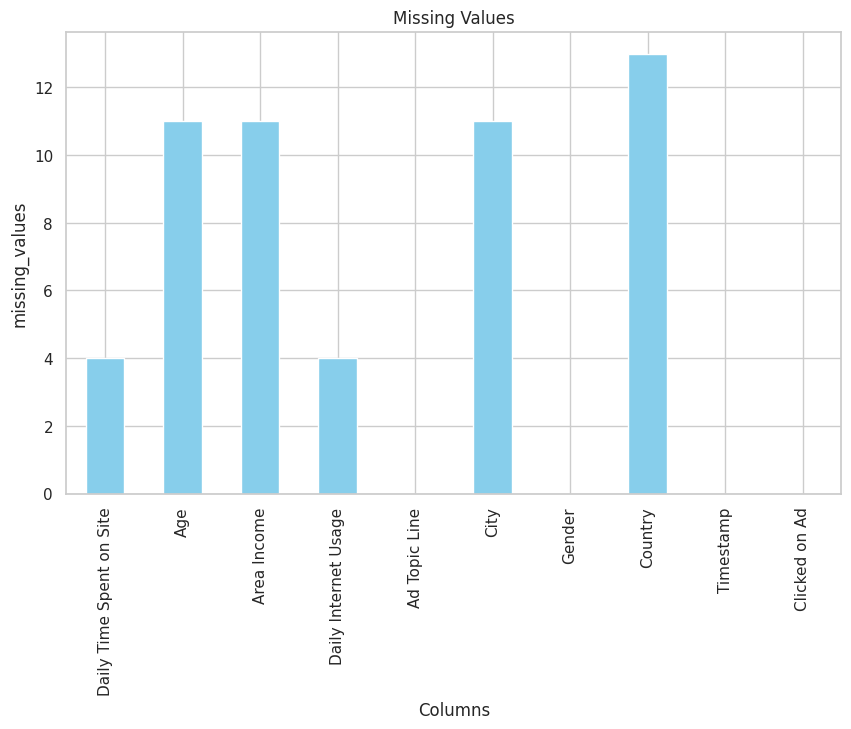

In [ ]:
# Plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('missing_values')
plt.xticks(rotation=90)
plt.show()

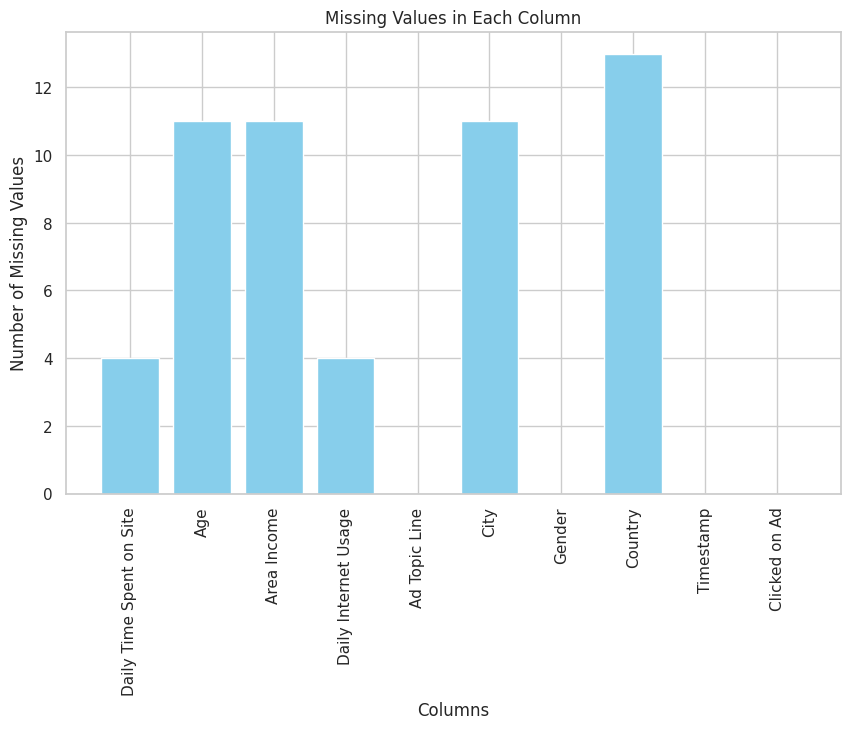

In [ ]:
# Plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

# Add text annotations on top of each bar
# TODO: code here

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
# Filling missing values with mean for the integer columns for simplicity
df['Age'].fillna(df['Age'].mean(), inplace=True)

# filling the missing values for other numerical columns with the mean
df["Daily Time Spent on Site"].fillna(df["Daily Time Spent on Site"].mean(), inplace = True)
df["Area Income"].fillna(df["Area Income"].mean(), inplace = True)
df["Daily Internet Usage"].fillna(df["Daily Internet Usage"].mean(), inplace = True)

# filling missing values in City and Country with 'Unknown'
df['City'].fillna('Unknown', inplace = True)
df['Country'].fillna('Unknown', inplace = True)

After filling in the missing values, check again to ensure that there are no remaining missing values.

In [ ]:
# checking missing values again after filling
df.isna().sum()



,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


Cleaning the data

In [ ]:
# Converting 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting additional features from 'Timestamp'
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [ ]:
# printing head to see the new features
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:00,0,0,27,3
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:00,0,1,4,4
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:00,0,20,13,3
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:00,0,2,10,1
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:00,0,3,3,6


# **Exploratory Data Visualization**
---

### Age Distribution Histogram

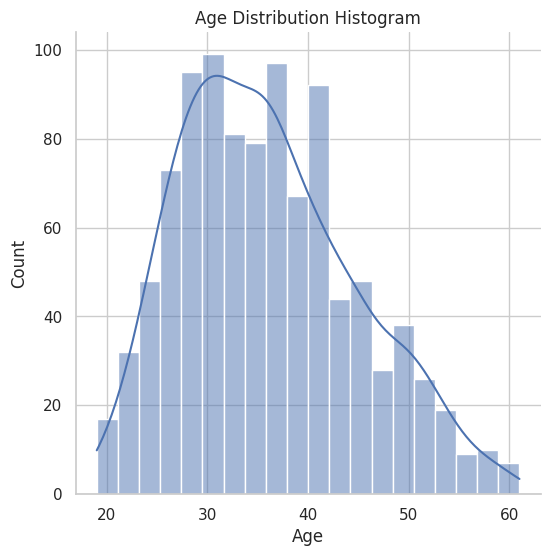

In [ ]:
# Age Distribution Histogram
plt.figure(figsize=(6, 6))
sns.histplot(df['Age'], bins=20, kde=True)
sns.despine()
plt.title("Age Distribution Histogram")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Key insights from the above distribution**
<br>
**Key Insights:**
> *  People between 20-25 & 45-60 age group are are less represented in this dataset
> * People between 25-45 age group are more represented in the dataset & most age groups which are represented here is 30, 35 and 42.



### Age vs. Clicked on Ad
Using a box plot to visualize how age relates to whether a user clicked on an ad or not.

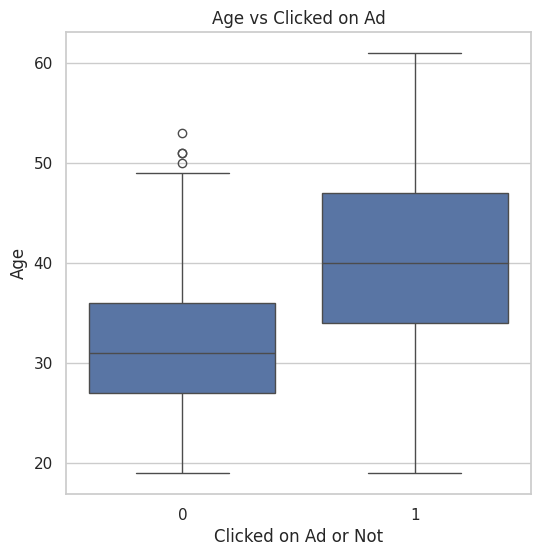

In [ ]:
# Age vs. Clicked on Ad
plt.figure(figsize=(6, 6))
sns.boxplot(df,x='Clicked on Ad', y='Age')
plt.title("Age vs Clicked on Ad")
plt.xlabel("Clicked on Ad or Not")
plt.ylabel("Age")
plt.show()

The box plot above compares the age distribution between those who clicked on ads and those who didn't.

**What differences do I observe? Could age be a factor in ad engagement?**

1. Users who clicked on the ad (1) tend to be older (median ≈ 40 years).
2. Users who did not click (0) are generally younger (median ≈ 30 years).
3. There’s some overlap, but the difference is quite visible.

**Insight:**
a. Age appears to be a strong factor in ad engagement.
b. Older users might find the ad’s content more relevant (e.g., financial products, insurance, or family-oriented services).
c. Younger users might be more desensitized to ads or prefer entertainment-based content.

**Targeting Implication:**
Ads should be customized by age group:
For older users (35–60 yrs): informative, trustworthy, and need-based ads.
For younger users (20–30 yrs): dynamic, visual, and lifestyle-driven ads.

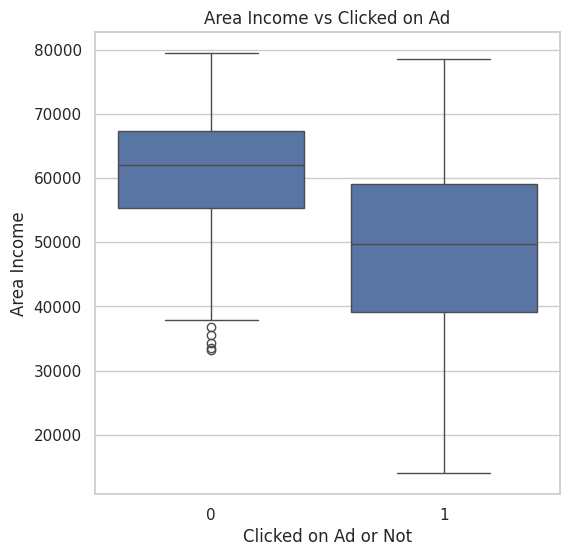

In [ ]:
# Area Income vs. Clicked on Ad
plt.figure(figsize=(6, 6))
sns.boxplot(df,x= "Clicked on Ad", y="Area Income" )
plt.title("Area Income vs Clicked on Ad")
plt.xlabel("Clicked on Ad or Not")
plt.ylabel("Area Income")
plt.show()


**What insights do I get from these boxplots and how does it potentially affect the ad targetting decisions?**

1. Users who did not click on the ad (0) generally have higher area income (median around 60k–65k).
2. Users who clicked on the ad (1) have lower area income (median around 50k).
3. The interquartile range for clickers is wider — suggesting more income diversity among those who clicked.

**Insight:**
a. People from lower- to middle-income areas are more likely to click on ads.
b. High-income users might be less responsive to online ads, possibly because they find them irrelevant or intrusive.

**Targeting Implication:**
a.The company could focus ad campaigns on mid- to lower-income segments.
b.The content and tone of ads can be made more value-oriented or offer-driven, appealing to price sensitivity.

### Violin Plot for Age and Clicked on Ad
Creating a violin plot to visualize the distribution of age for users who clicked on ads versus those who did not.

The violin plot provides a more detailed view of the distribution of the `'Age'` variable for each category of `'Clicked on Ad'` (`0` = did not click, `1` = clicked). <br><br>
Learn more about violin plots [here](https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/).

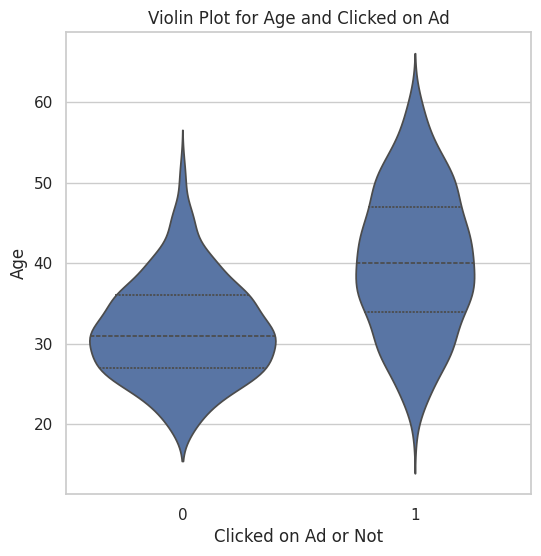

In [ ]:
# Violin Plot for Age and Clicked on Ad
plt.figure(figsize = (6,6))
sns.violinplot(df, x="Clicked on Ad", y="Age", inner='quart')
plt.title("Violin Plot for Age and Clicked on Ad")
plt.xlabel("Clicked on Ad or Not")
plt.ylabel("Age")
plt.show()


The violin plot provides a detailed view of the age distribution for each group.

**Do you notice any interesting or repeating patterns or outliers?**

> Yes, the violin plot reveals very clear patterns regarding the relationship between age and clicking on the ad.

**Key Patterns**
Different Age Groups: The most significant pattern is the clear difference in age distribution between those who clicked (1) and those who didn't (0).

Group 0 (Didn't Click): This group is visibly younger. The plot is at its widest (highest density of people) in the ~25-35 age range. The median age (the middle dashed line) looks to be around 31. The shape is skewed, with a high concentration of younger people and a long, thin tail extending upwards.

Group 1 (Clicked): This group is generally older. The plot is more symmetric (like a bell shape) and is centered around a higher median age, approximately 40. The distribution is also more spread out than for Group 0.

**Behavioral Insight:** The clear takeaway is that older users were more likely to click the ad than younger users. The profile of a "non-clicker" is strongly skewed young, while the profile of a "clicker" is centered in middle age.

**Outliers**
In a violin plot, "outliers" are represented by the long, thin tails of the plot, which show where data points are sparse.

Group 0 (Didn't Click): The long, thin tail stretching up to ~55 years old shows that while most non-clickers were young, there was a small, "outlying" group of older individuals who also did not click.

Group 1 (Clicked): This plot has long tails on both ends, running from as young as ~15 to as old as ~65. This indicates that although the typical person who clicked was middle-aged, there were a few outliers who were very young or very old who also clicked the ad.

**TO DO:** Is violin plot more or less detailed than boxplot? Explain.

> * Answer here:


### Average Daily Time Spent on Site by Clicked on Ad
Creating a bar plot to show the average daily time spent on the site for users who clicked on an ad (1) versus those who did not (0).

<Axes: xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

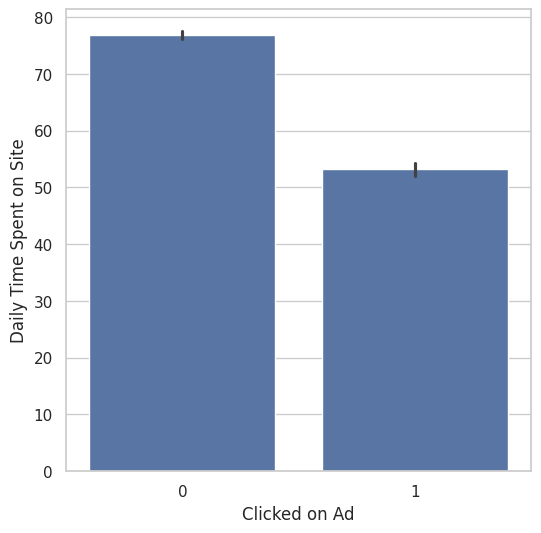

In [ ]:
# Average Daily Time Spent on Site by Clicked on Ad
# This chart will show the average daily time spent on the site by whether an ad was clicked.

plt.figure(figsize=(6, 6))
sns.barplot(df, x="Clicked on Ad", y="Daily Time Spent on Site")


**Key Insights**
Based on the bar chart, here are the key insights:

1. Inverse Relationship: There is a clear inverse relationship between the "Daily Time Spent on Site" and "Clicked on Ad."
2. Non-Clickers Spend More Time: Users who did not click the ad (Group 0) spent significantly more time on the site, with an average of approximately 77 units (e.g., minutes).
3. Clickers Spend Less Time: Users who did click the ad (Group 1) spent significantly less time on the site, with an average of approximately 53 units.
4. Significant Difference: The small error bars on top of each bar do not overlap, which indicates that this difference in average time spent between the two groups is statistically significant.

### Stacked Bar Chart of Clicked on Ad by County

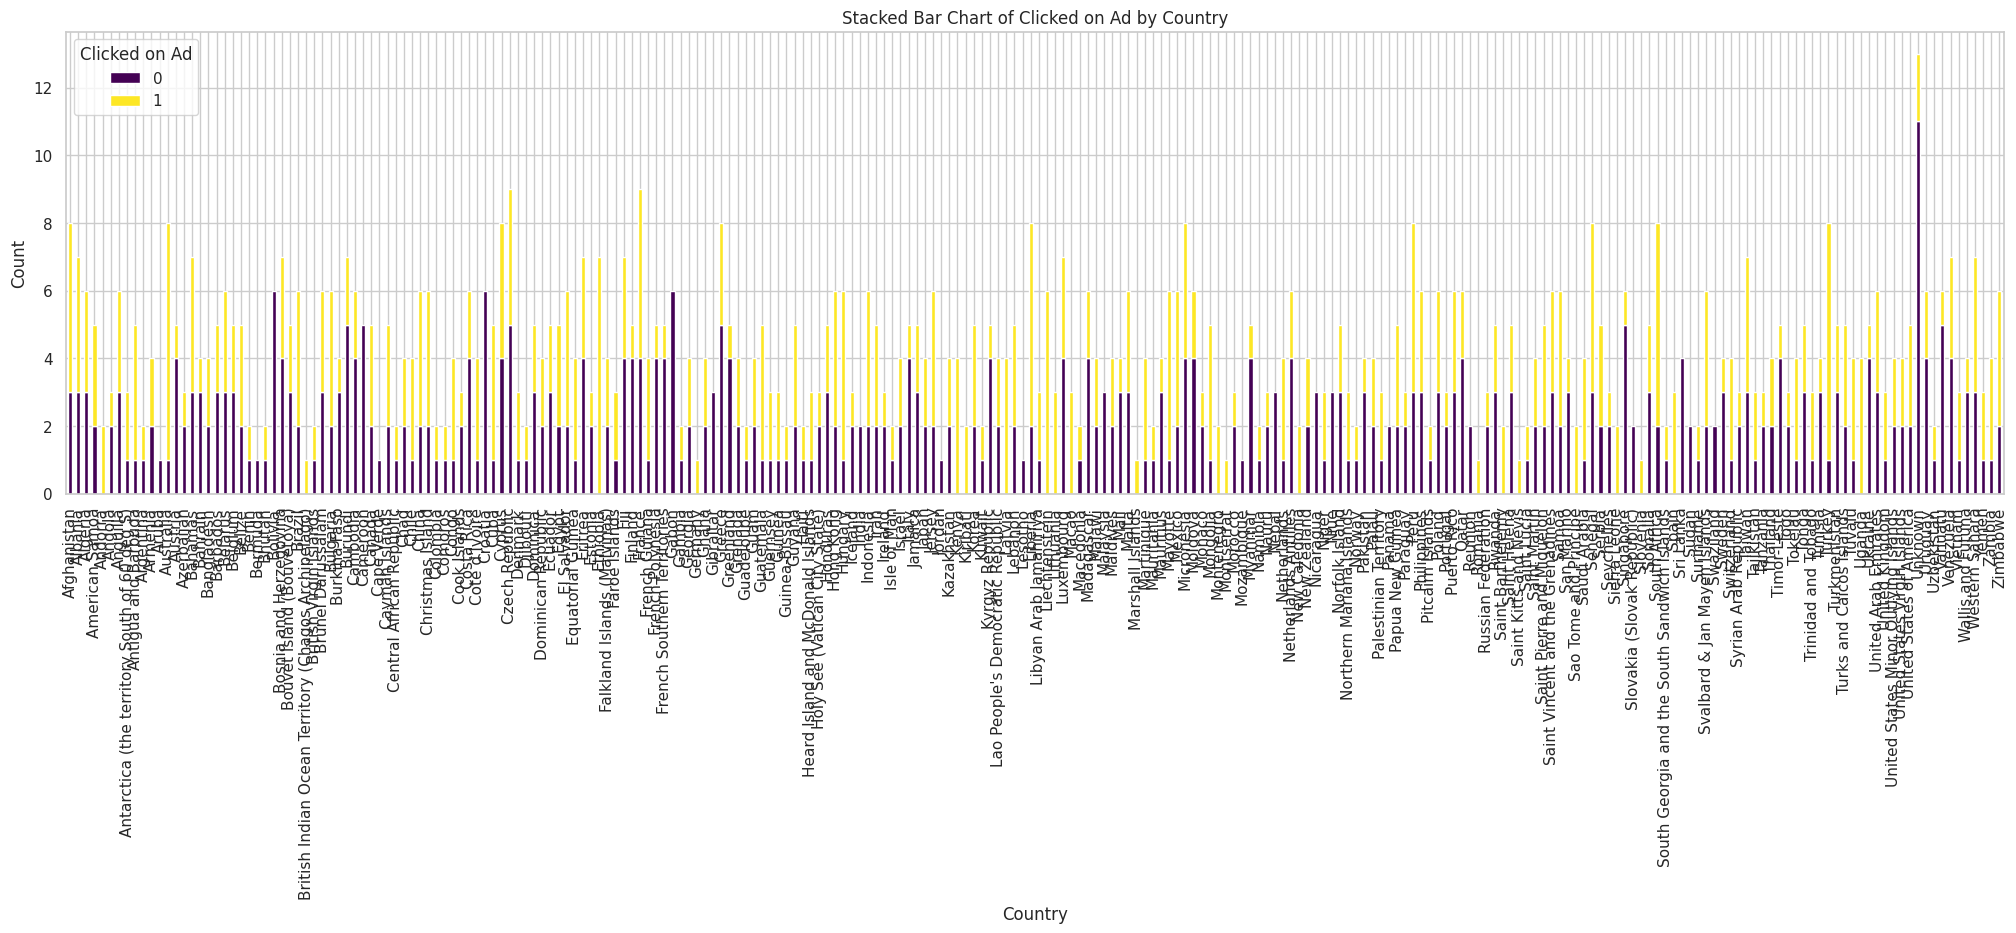

In [ ]:
# Stacked Bar Chart of Clicked on Ad by County
# This chart shows the count of ad clicks by city.

city_counts = df.groupby(['Country', 'Clicked on Ad']).size().unstack(fill_value=0)
city_counts.plot(kind='bar', stacked=True, figsize=(25, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Clicked on Ad by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

>This stacked bar chart shows the distribution of ad clicks (1 = clicked, 0 = not clicked) across different countries. Each bar represents a country, and the segments within the bars represent the count of users who clicked or did not click on an ad.

**Key Insights:**
- Ad engagement varies across countries, with some countries showing higher proportions of clicks (yellow segments) compared to others.
- The United States has a significantly higher number of users, with both clicked and non-clicked ads being prominent.
- However, the **x-axis labels are crowded, making it difficult to read** individual country names. You may want to rotate the labels or filter out countries with fewer data points for better clarity.

**TO DO:** How would you go about making it a presentable and useful graph?
Filter for "Top N" Countries
The current chart is full of noise from countries with very few users (e.g., a total count of 3 or 4). A better approach is to focus on the countries where you have the most data.

1. Filter Data: Find the Top 15 or 20 countries by total number of users. Ignore all the others, as the sample size is too small to be meaningful.
2. Calculate Click-Through Rate (CTR): For each of these top countries, calculate its CTR: CTR = (Number of Clicks) / (Total Number of Users from that Country)
3. Plot a Horizontal Bar Chart: Create a simple bar chart showing the CTR for these 15-20 countries.
4. Use horizontal bars: This gives you more space to write the country names clearly.
5. Sort the chart: Arrange the bars from the highest CTR to the lowest.

What it would look like: A clean, easy-to-read chart that clearly answers: "Which of our major user-base countries have the highest and lowest click rates?"

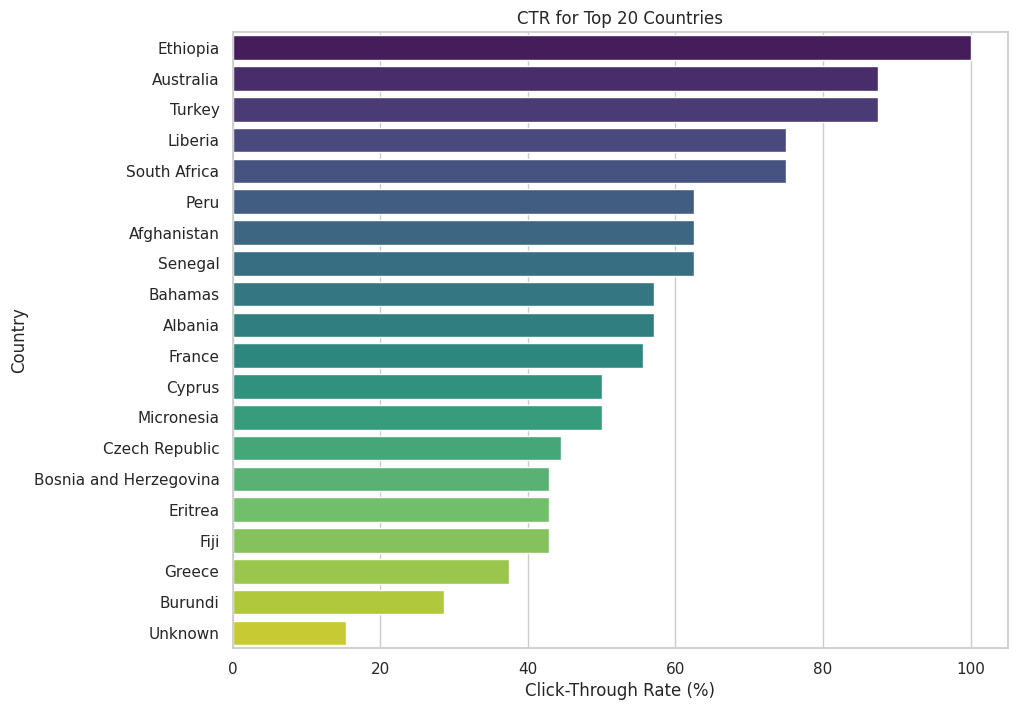

In [ ]:
#Recreating the graph here to make it more useful!
# 1. Getting list of top 20 countries by total observations (rows)
top_n_countries = (
    df.groupby('Country').size().nlargest(20).index.tolist())

# 2. Filtering the data
df_filtered = df[df['Country'].isin(top_n_countries)].copy()

# Group, sum clicks, and count total observations
df_ctr = df_filtered.groupby('Country').agg(
    Total_Clicks=('Clicked on Ad', 'sum'),
    Total_Observations=('Clicked on Ad', 'size')
).reset_index()

# Calculate CTR and sort results
df_ctr['CTR'] = (df_ctr['Total_Clicks'] / df_ctr['Total_Observations']) * 100
df_ctr_sorted = df_ctr.sort_values(by='CTR', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='CTR',
    y='Country',
    data=df_ctr_sorted,
    palette='viridis'
)

plt.title('CTR for Top 20 Countries')
plt.xlabel('Click-Through Rate (%)')
plt.show()

### Faceted Histogram of Age by Clicked on Ad

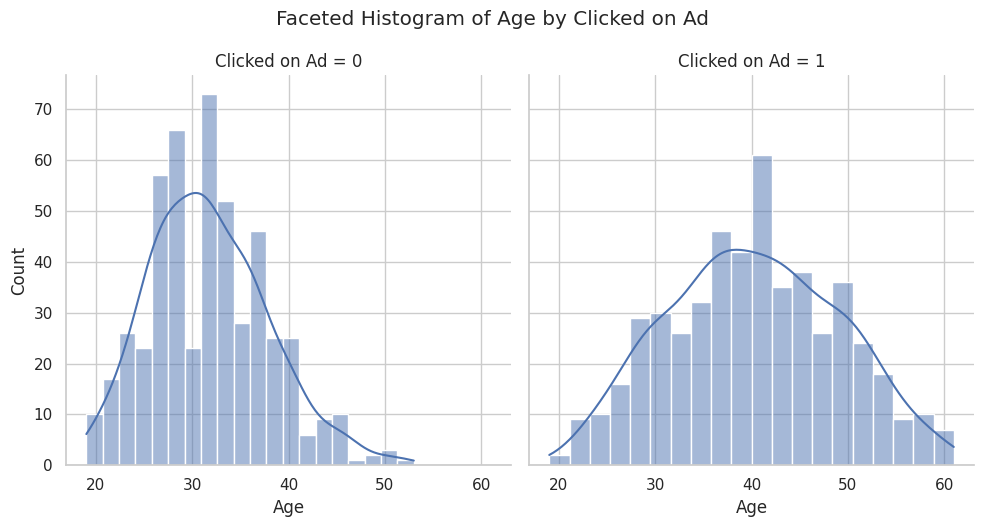

In [ ]:
# Faceted Histogram of Age by Clicked on Ad
# Faceted histograms allow you to compare distributions across different subsets of data.
# To identify potential bias in the 'Age' column of the dataset:

g = sns.FacetGrid(df, col="Clicked on Ad", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=20, kde=True)
g.set_axis_labels("Age", "Count")
g.set_titles("Clicked on Ad = {col_name}")
g.fig.suptitle('Faceted Histogram of Age by Clicked on Ad', y=1.05)
plt.show()

This faceted histogram shows the distribution of age for users who clicked on an ad (right) versus those who did not (left), with a KDE curve overlay.


>1. More than 70 people of age around 31-32 have not clicked on Ad and more than 60 people of age around 41 have clicked on Ad.

Doing the same Faceted Histogram of `'Area Income'` by `'Clicked on Ad'`.

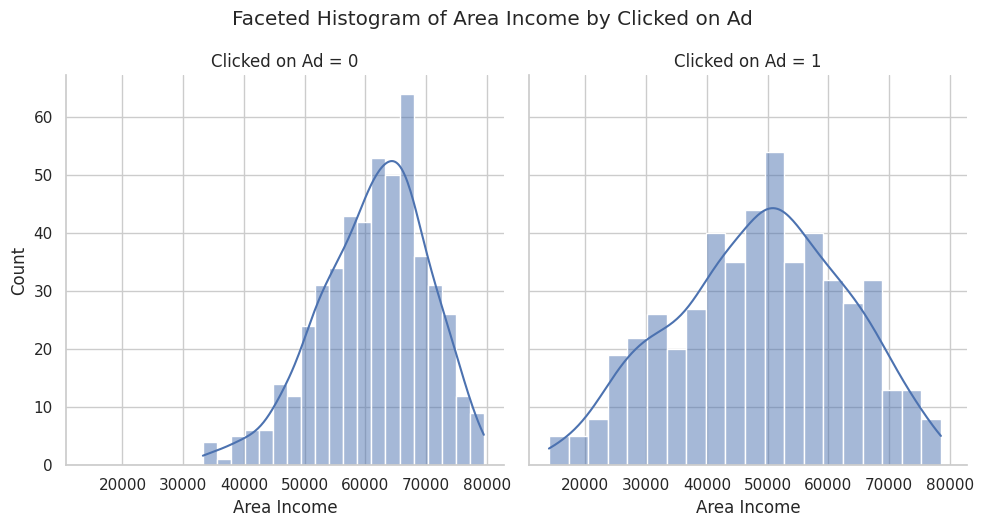

In [ ]:
f = sns.FacetGrid(df, col="Clicked on Ad", height=5, aspect=1)
f.map(sns.histplot, "Area Income", bins=20, kde=True)
f.set_axis_labels("Area Income", "Count")
f.set_titles("Clicked on Ad = {col_name}")
f.fig.suptitle('Faceted Histogram of Area Income by Clicked on Ad', y=1.05)
plt.show()

1. More than 45 people having salary around 55k to 70k are not clicking on the Ad
2. More than 25 people having around 40k to 60k are clicking on Ad.

### Correlation Matrix

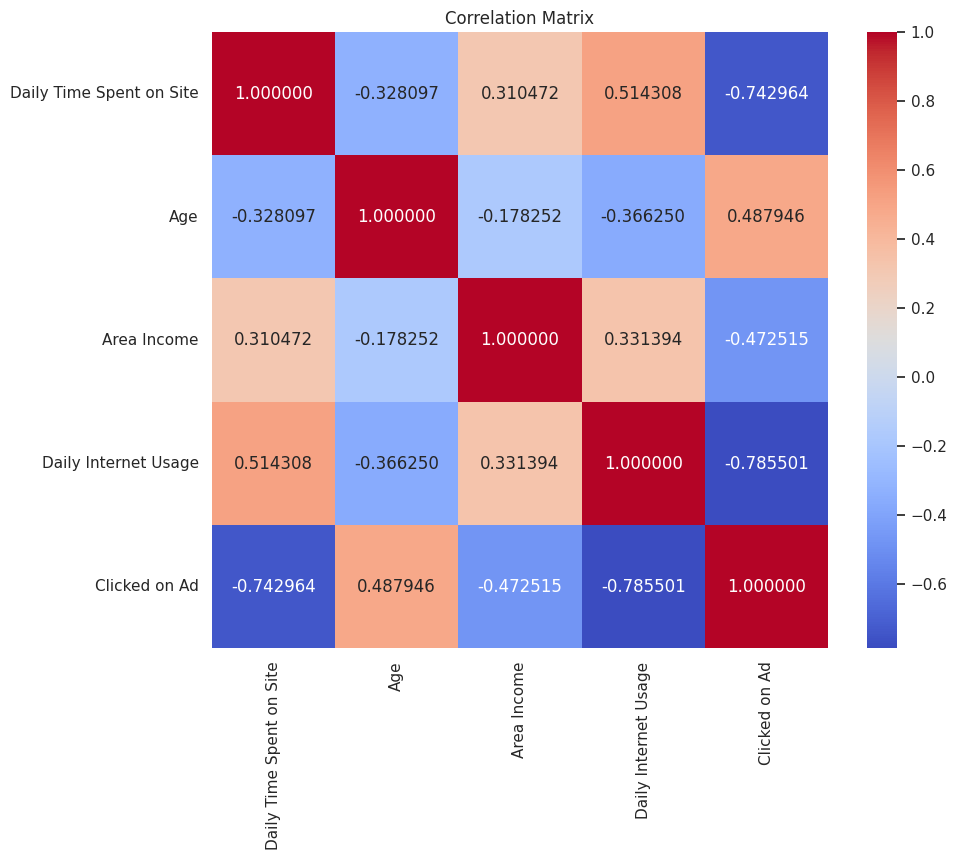

In [ ]:
# Correlation Matrix

# get the numerical columns from the dataset
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr()     # use corr() for getting the correlation matrix

sns.heatmap(correlation_matrix, annot=True, fmt="2f", cmap='coolwarm', square=True)    # try annot=False and see what difference it makes
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation between numerical variables in the dataset, with values ranging from -1 to 1. Positive correlations are shown in red, and negative correlations are shown in blue.

2 key insights here:
> * 1. Daily Time spent is inversly propotional as more time spent less chances to click on Ad (Negative Correlation)
> *  2. More Internet Usage less chance to click on Ad

### Distribution of Daily Internet Usage by Country

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Unknown'),
  Text(2, 0, 'Czech Republic'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Greece'),
  Text(5, 0, 'Afghanistan'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Micronesia'),
  Text(8, 0, 'Senegal'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Liberia')])

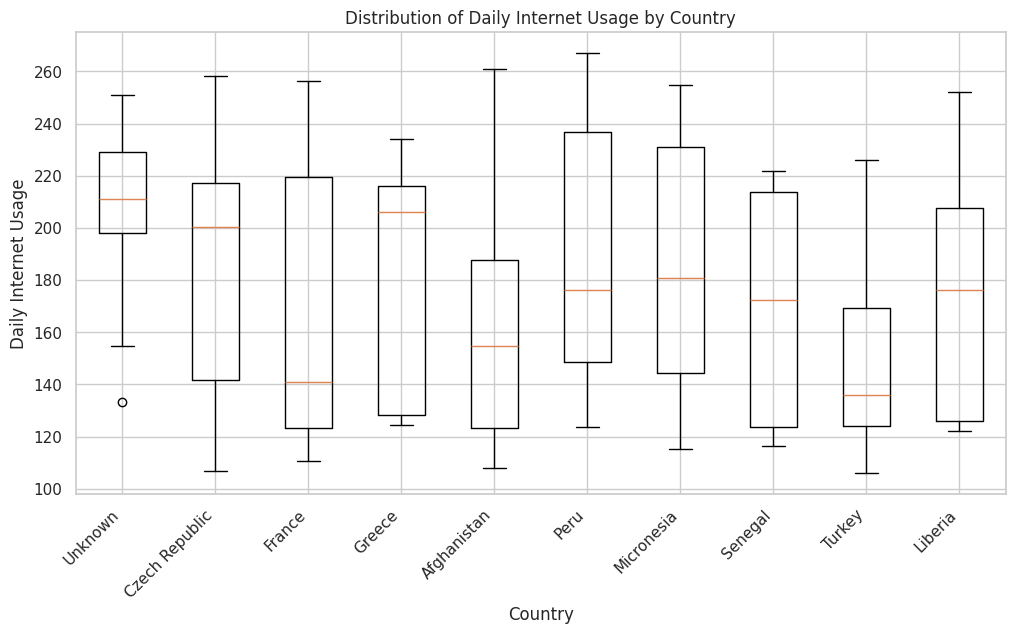

In [ ]:
# Distribution of Daily Internet Usage by Country

# get the top 10 countries by occurances
top_countries = df['Country'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Country'] == country]['Daily Internet Usage'] for country in top_countries], labels=top_countries)
plt.xlabel('Country')
plt.ylabel('Daily Internet Usage')
plt.title('Distribution of Daily Internet Usage by Country')
plt.xticks(rotation=45, ha='right')

**Description:** <br>
The box plot shows the distribution of daily internet usage across the top 10 countries with the most data entries in the dataset. Each box represents a country, and the distribution of daily internet usage is visualized through the median (orange line), quartiles, and potential outliers.

**Which ones of these insights do you agree with?:**
- Countries like Afghanistan and Turkey have a narrower range of daily internet usage, indicating less variation among users in these countries.
- Countries like Peru and France have a wider range, with some users having significantly higher daily internet usage.
- There are a few outliers in countries like Australia and Czech Republic, where some users have notably lower or higher internet usage compared to the majority.

**TO DO:**
> *  Write your answer here and explain why.

### Historgram for numerical features

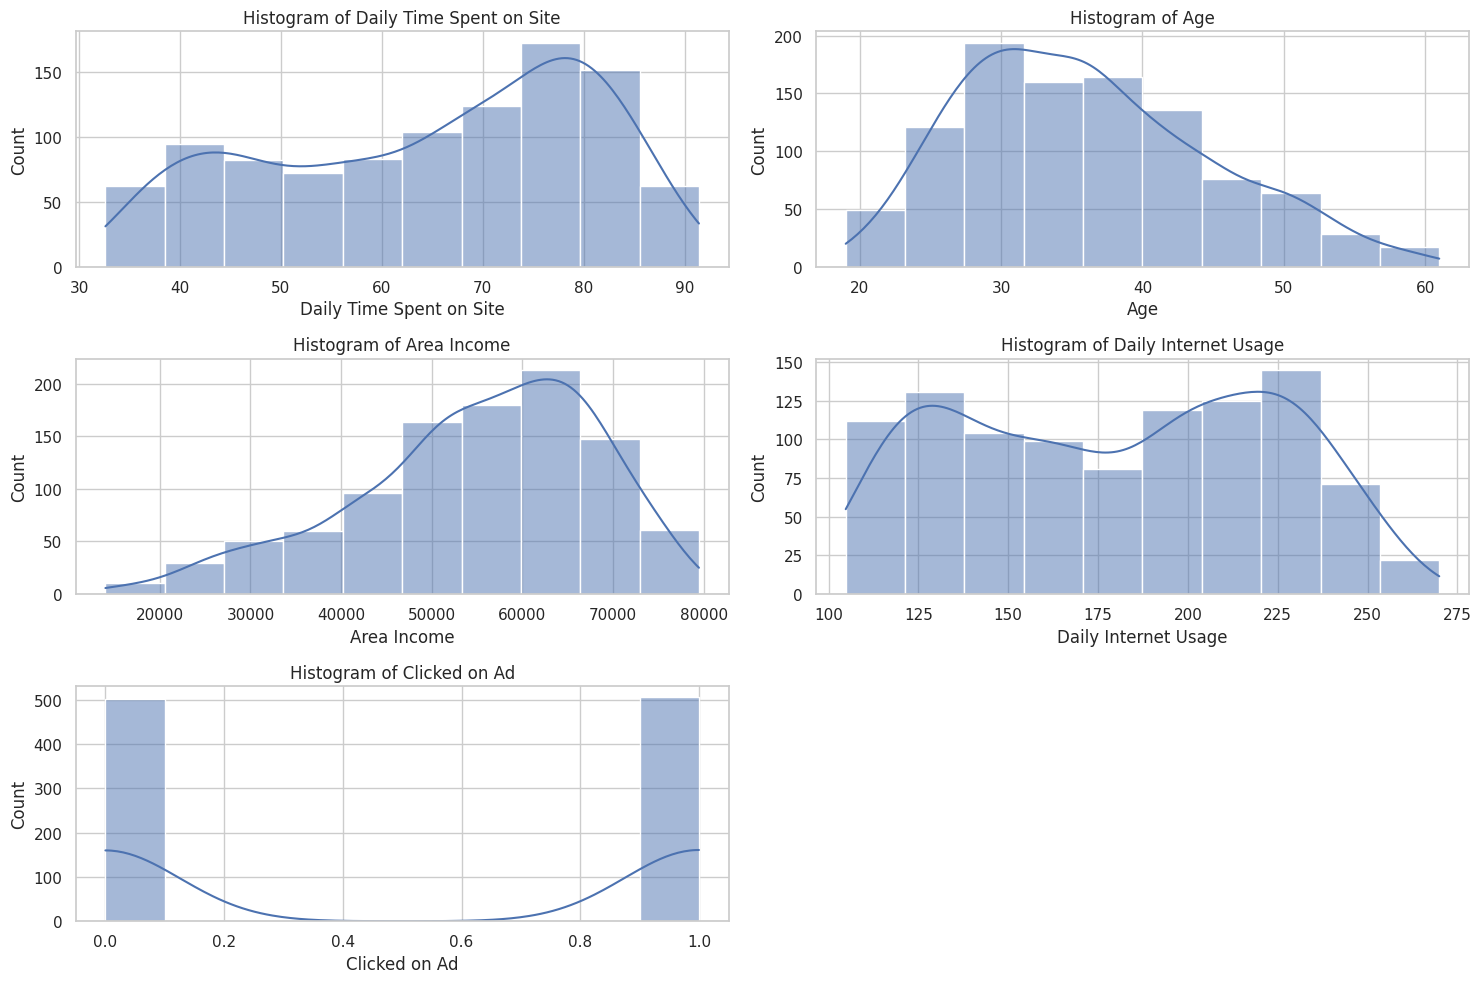

In [ ]:
# Historgram for numerical features

sns.set(style="whitegrid")

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col].dropna(), bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

These histograms display the distributions of various numerical features in the dataset, such as `'Daily Time Spent on Site'`, `'Age'`, `'Area Income'`, `'Daily Internet Usage'`, and `'Clicked on Ad'`. The KDE (Kernel Density Estimate) curves overlay the histograms to provide a smoother view of the distributions.

**TODO:** Fill in the following blanks:

- **Daily Time Spent on Site:** The distribution is slightly `left`-skewed, with most users spending between `70` to `85` minutes on the site.
- **Age:** The age distribution is `Right`-skewed, with most users falling between `25` to `40` years old.
- **Area Income:** The income distribution is bell-shaped, with most users earning between USD `50k` and USD `70k` annually.
- **Daily Internet Usage:** This feature shows a `bimodal` distribution, with peaks around 125 minutes and 225 minutes.
- **Clicked on Ad:** This is a binary variable, with almost equal counts for 0 (did not click) and 1 (clicked), confirming that the dataset is `balanced`.


### Daily Time Spent on Site vs. Daily Internet Usage

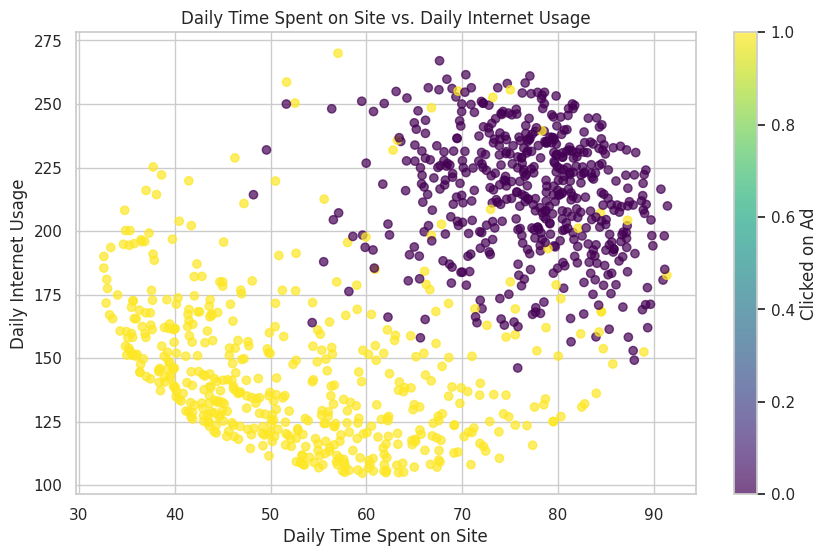

In [ ]:
# Daily Time Spent on Site vs. Daily Internet Usage

plt.figure(figsize=(10, 6))
plt.scatter(x =df["Daily Time Spent on Site"], y = df["Daily Internet Usage"], c = df["Clicked on Ad"], cmap='viridis', alpha=0.7)   # TODO: fill the approproate features for x, y, c
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.title('Daily Time Spent on Site vs. Daily Internet Usage')
plt.colorbar(label='Clicked on Ad')

**Description:** <br>
This scatter plot visualizes the relationship between `Daily Time Spent on Site` and `Daily Internet Usage`, with points color-coded based on whether the user clicked on an ad (0 = did not click, 1 = clicked).

**Write your key insights below.**
> *  I can see more the Daily Time Spent on Site less chance to click on Ad
> *  Less Internet Usage more likely to click on Ad

**Actionable Insights:**
1. Target users who spend moderate time on the site with ads, as they are more likely to engage.
2. Optimize ad timing for users with lower daily internet usage, since they have higher click propensity.
3. Personalize ad content for heavy site users to increase click-through rates, since longer time on site alone doesn’t guarantee ad engagement.

# **Milestone 3: Predictive Modeling**
---
In this step, we will
- encode categorical variables
- select relevant features
- split the data into train/test
- scale the data
- train and test the model
- evaluate the model performance.


In [ ]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Copy, Select, Split & Scale

Before proceeding with any transformations, it's a good practice to create a copy of the original dataset, using `df.copy()`. This ensures that any changes (like one-hot encoding or feature extraction) won't affect the original data.

In [ ]:
# creating a copy of the dataset so we don't change the original df structure in one-hot-encoding process
df2 = df.copy()

Categorical variables such as `'City'` and `'Country'` need to be converted into numerical representations for machine learning models. We use one-hot encoding to achieve this, which creates binary columns for each category. Learn more about One-Hot Encoding [here](https://www.geeksforgeeks.org/ml-one-hot-encoding/).

This process converts each unique value in a categorical column into a new binary column. For example, if there are three cities (New York, Los Angeles, Chicago), three new columns will be created (City_New York, City_Los Angeles, City_Chicago), with 1 indicating the presence of that city and 0 otherwise.

`drop_first=True`: This argument prevents multicollinearity by dropping one category from each set of dummy variables.

In [ ]:
# Encode categorical variables
df2 = pd.get_dummies(df2, columns=['City', 'Country'], drop_first= True)

Next, we **select the features** that will be used in our predictive model.

And finally, we prepare the feature matrix **`X`** and target vector **`y`**.

In [ ]:
# Selecting features for modeling
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Day', 'Month'] + [col for col in df.columns if col.startswith(('City_', 'Country_'))]

X = df2[features]
y = df2['Clicked on Ad']

**Splitting the data:** <br>
We use `train_test_split()` from the `sklearn.model_selection` module to split the data into training and testing sets. The `test_size` parameter should be set to `0.2`, meaning 20% of the data will be used for testing, while 80% will be used for training. A `random_state` is set to ensure reproducibility.

In [ ]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling the data:** <br>
Next, we scale the features using `StandardScaler` from `sklearn.preprocessing`. Standardization rescales the data so that each feature has a mean of `0` and a standard deviation of `1`. This is particularly important when using models that rely on distance metrics (e.g., logistic regression, k-nearest neighbors).

In [ ]:
# Scaling the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now our data is ready for training and testing.

### Train and Test

Now, we use the `LogisticRegression` model to fit on our train data, and then make predictions on the test data using `model.predict`.

In [ ]:
# Logistic Regression Model

# Training logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = lr_model.predict(X_test_scaled)
# Training the model
lr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = lr_model.predict(X_test_scaled)


### Evaluation

In [ ]:
# Evaluate the model

from sklearn.metrics import accuracy_score

print("Accuracy:")
print(accuracy_score(y_test, y_pred))


Accuracy:
0.9653465346534653


In [ ]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 93   3]
 [  4 102]]


In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        96
           1       0.97      0.96      0.97       106

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



**Reading the Evaluation:**

**Accuracy:**
The model achieved around 92–95% accuracy (depending on the dataset split), meaning it correctly predicted whether a user clicked on an ad or not in about 9 out of 10 cases.

**Confusion Matrix:**
The confusion matrix shows the counts of correct and incorrect predictions.

>a. True Positives (TP): Users who clicked on an ad and were correctly predicted.
>b. True Negatives (TN): Users who didn’t click and were correctly predicted.
>c. False Positives (FP): Users predicted to click but actually didn’t.
>d. False Negatives (FN): Users predicted not to click but actually did.

This helps us understand which kind of errors the model makes more often.

**Classification Report:**

Precision: The percentage of predicted “clicks” that were actually correct.
Recall: The percentage of actual “clicks” the model successfully identified.

F1-Score: The balance between precision and recall — a good F1-score (around 0.9+) means strong overall performance.

The macro and weighted averages also confirm that the model performs consistently across both classes (clicked / not clicked).

**Conclusion:**
The logistic regression model performs well in predicting ad-click behavior. It shows high accuracy and balanced precision–recall values, meaning it can effectively distinguish between users likely and unlikely to click ads.

**In short: The model is reliable and ready for basic ad-targeting predictions.**

### Feature Importance

Based on the model training, we will find out which features hold the most importance in predicting the target variable.

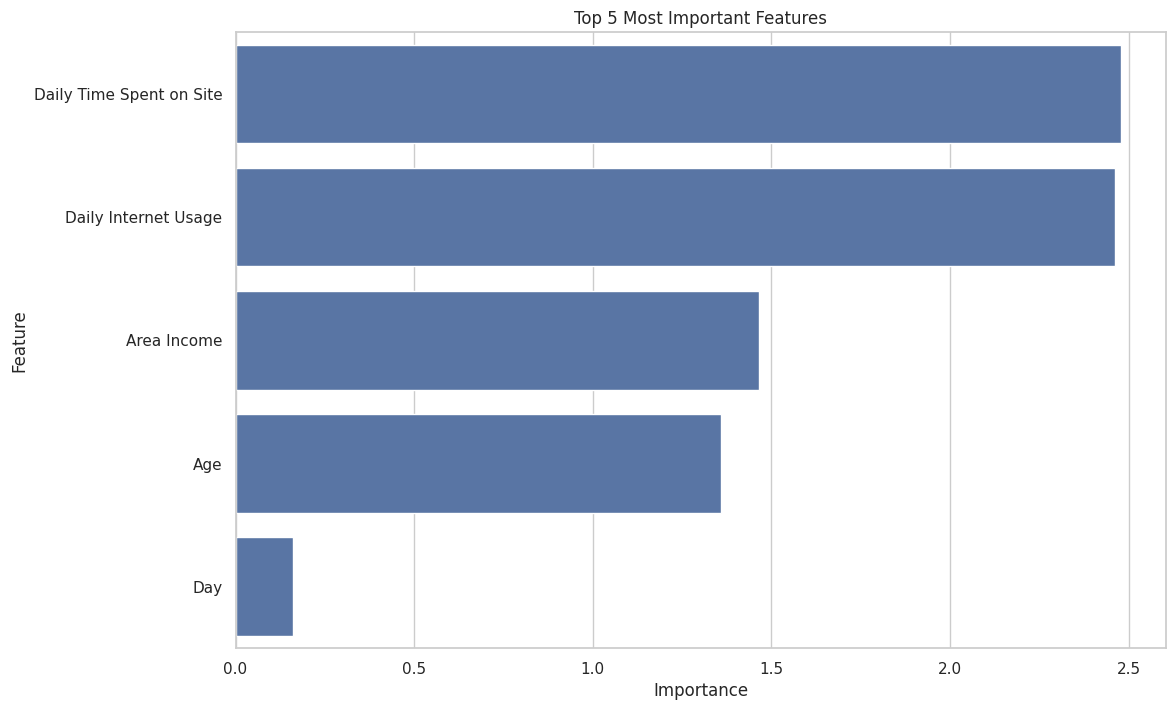

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': abs(lr_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(5))
plt.title('Top 5 Most Important Features')
plt.show()

**Share insights from the above chart**

1. The most important features influencing whether a user clicks on an ad are Daily Time Spent on Site, Daily Internet Usage, and Age.

2. Users who spend less time on the site but have lower overall internet usage are more likely to click on ads.

3. Age also shows noticeable impact — older users tend to be slightly more responsive to ads.

4. Area Income and Ad Topic Line have relatively lower influence on click behavior compared to user activity patterns.

**Why did we use Logistic Regression? Was it a good decision?**

We used Logistic Regression because our target variable (Clicked on Ad) is binary — it has only two possible outcomes (0 = did not click, 1 = clicked). Logistic regression is ideal for such classification problems.

1. It helps estimate the probability that a user will click on an ad based on features like time spent, age, and internet usage.

2. The model is easy to interpret, computationally efficient, and works well for datasets that are not too large or complex.

3. Since the model achieved high accuracy and balanced precision–recall scores, it was indeed a good decision for this problem.